# Actividad - Iris dataset

Vamos a trabajar con el Iris Dataset, probablemente uno de los más famosos datasets.

Es un dataset sencillo pero muy ilustrativo.

En esta actividad vamos a practicar técnicas de análisis exploratorio vistas.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Estudiando el dataset

Vamos a empezar estudiando el dataset. Para eso lo primero que hacemos es cargarlos y ver cómo están formadas sus instancias y cuales son sus columnas.

In [2]:
data = pd.read_csv("iris_dataset.csv")
data.head()

,fila,sepal_length,sepal_width,petal_length,petal_width,species
0,fila1,5.1,3.5,1.4,0.2,setosa
1,fila2,4.9,3.0,1.4,0.2,setosa
2,fila3,4.7,3.2,1.3,0.2,setosa
3,fila4,4.6,3.1,1.5,0.2,setosa
4,fila5,5.0,3.6,1.4,0.2,setosa


Entre los diferentes atributos tenemos los largos y anchos de pétalos y sépalos, y la especie de la flor.

Conociendo estos atributos vamos a comenzar haciendo un análisis exploratorio y estadístico de los valores.

Existen muchas formas de estudiar las variables, en este caso elegimos obtener la siguiente información:
- Especies únicas existentes en el dataset
- Obtener largo total del dataset
- Rango de valores en los cuales se encuentran los atributos
- Varianza de los atributos
- Desvío estandar
- Descripción estadística

## Especies únicas y largo del dataset

In [3]:
especies = list(data["species"].unique())
print("Tipos de especies: %s\n" % especies)

print("Largo del dataset: %i\n" % len(data))


Tipos de especies: ['setosa', 'versicolor', 'virginica']

Largo del dataset: 150



## Rango del largo y ancho de pétalos y sépalos

In [4]:
print("Rango del largo del sépalo: [%s, %s]" % (min(data["sepal_length"]), max(data["sepal_length"])))
print("Rango del ancho del sépalo: [%s, %s]" % (min(data["sepal_width"]), max(data["sepal_width"])))
print("Rango del largo del pétalo: [%s, %s]" % (min(data["petal_length"]), max(data["petal_length"])))
print("Rango del ancho del pétalo: [%s, %s]\n" % (min(data["petal_width"]), max(data["petal_width"])))


Rango del largo del sépalo: [4.3, 7.9]
Rango del ancho del sépalo: [2.0, 4.4]
Rango del largo del pétalo: [1.0, 6.9]
Rango del ancho del pétalo: [0.1, 2.5]



## Varianza y desvío estandar

In [5]:

print("Varianza del largo del sépalo:\t %f" % np.var(data["sepal_length"]))
print("Varianza del ancho del sépalo:\t %f" % np.var(data["sepal_width"]))
print("Varianza del largo del pétalo:\t %f" % np.var(data["petal_length"]))
print("Varianza del ancho del pétalo:\t %f\n" % np.var(data["petal_width"]))

print("Desvío estandar del largo del sépalo\t %f" % np.std(data["sepal_length"]))
print("Desvío estandar del ancho del sépalo\t %f" % np.std(data["sepal_width"]))
print("Desvío estandar del largo del pétalo\t %f" % np.std(data["petal_length"]))
print("Desvío estandar del ancho del pétalo\t %f\n" % np.std(data["petal_width"]))


Varianza del largo del sépalo:	 0.681122
Varianza del ancho del sépalo:	 0.186751
Varianza del largo del pétalo:	 3.092425
Varianza del ancho del pétalo:	 0.578532

Desvío estandar del largo del sépalo	 0.825301
Desvío estandar del ancho del sépalo	 0.432147
Desvío estandar del largo del pétalo	 1.758529
Desvío estandar del ancho del pétalo	 0.760613



In [6]:
print("Descripción\n---")
print(data[data.columns[2:]].describe())

Descripción
---
       sepal_width  petal_length  petal_width
count   150.000000    150.000000   150.000000
mean      3.054000      3.758667     1.198667
std       0.433594      1.764420     0.763161
min       2.000000      1.000000     0.100000
25%       2.800000      1.600000     0.300000
50%       3.000000      4.350000     1.300000
75%       3.300000      5.100000     1.800000
max       4.400000      6.900000     2.500000


In [7]:
data.shape

(150, 6)

In [8]:
data.count()

,0
fila,150
sepal_length,150
sepal_width,150
petal_length,150
petal_width,150
species,150


In [9]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
data.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


# Cómo se distribuyen los datos

Ahora que ya tenemos la información básica descriptiva de nuestros datos vamos a hacer algunas visualización para estudiar la distribución de sus datos. Comenzaremos con histogramas de cada una de sus columnas

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

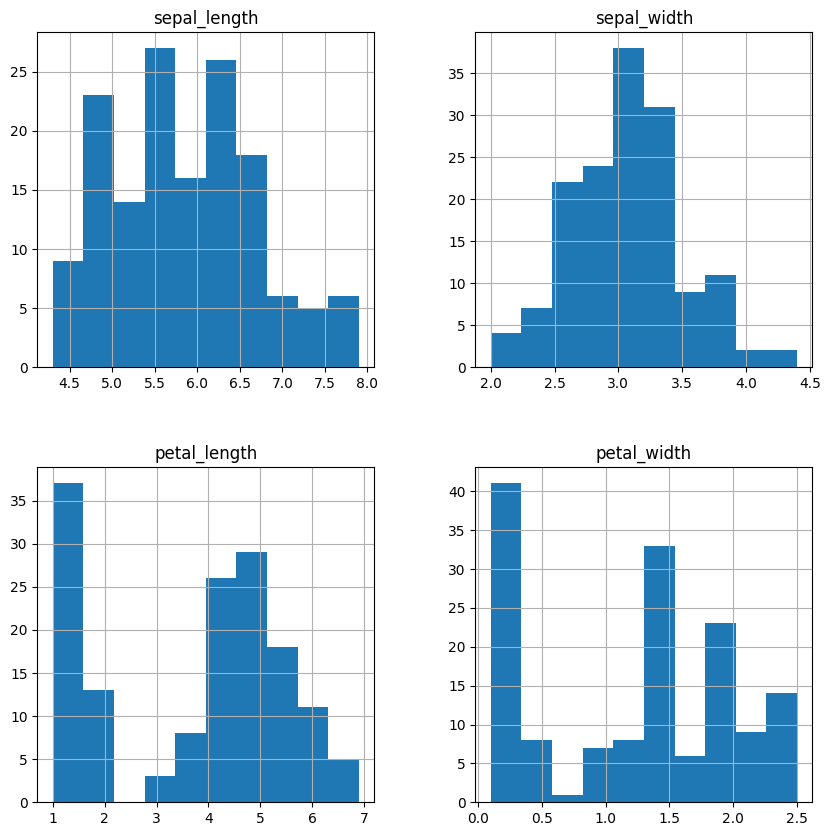

In [11]:
data.hist(
    column=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"],
    figsize=(10, 10))


Además de los histogramas podríamos haber hecho una visualización más informativa, como puede ser el `pairplot` que nos provee `seaborn`.

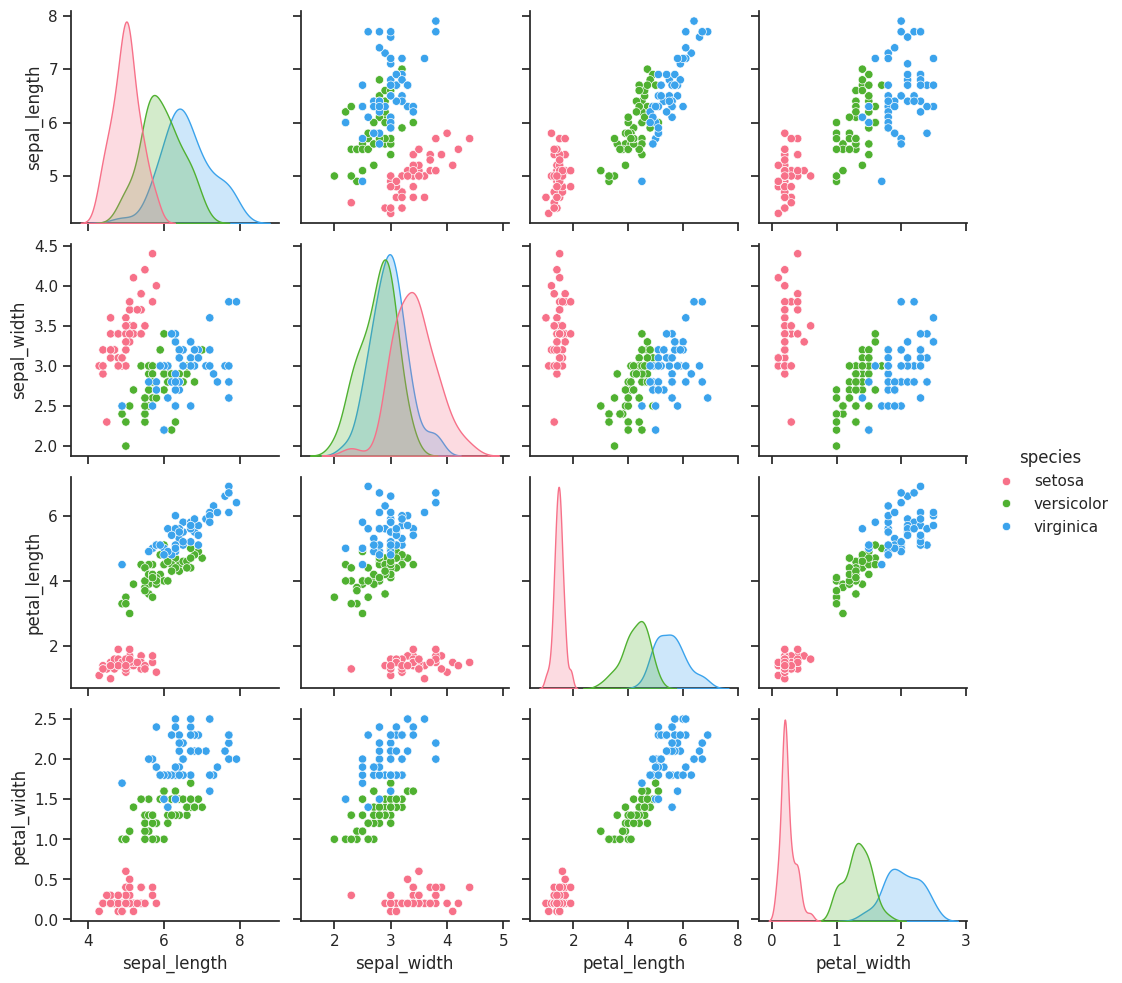

In [12]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data.drop('fila', axis=1), diag_kind='kde', hue="species", palette="husl")


# Estudio de correlaciones

Ya estuvimos viendo diferentes visualizaciones de nuestros datos y realizando un análisis descriptivo a nivel estadístico de los campos. A continuación vamos a estudiar la correlación que existe entre las columnas para intentar sacar algunas conclusiones.

In [14]:
# Seleccionar solo las columnas numéricas para calcular la correlación
data.select_dtypes(include=['number']).corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Una vez que tenemos la tabla de correlaciones podemos hacer un `heatmap` para ver más fácilmente estas relaciones.

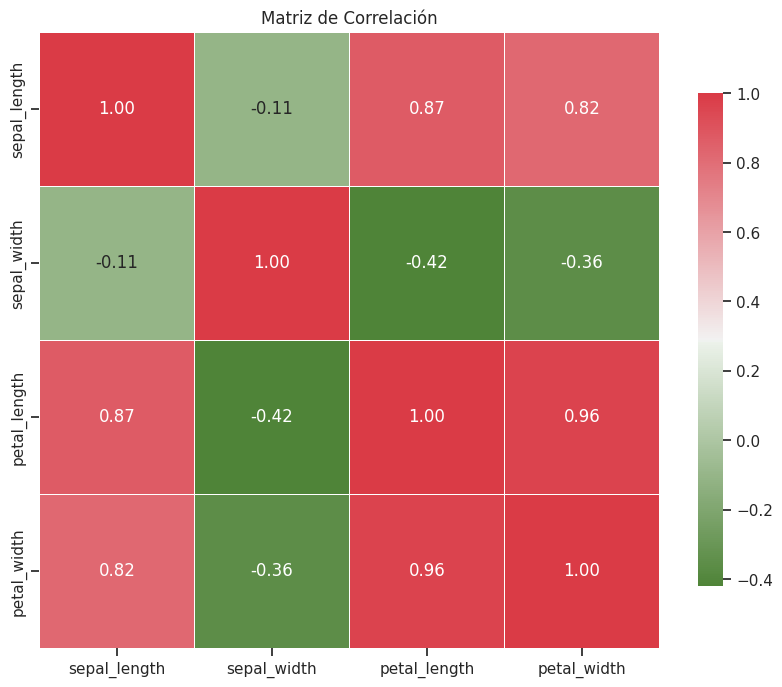

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
dt = data.select_dtypes(include=['number'])

# Calculamos la matriz de correlación
corr = dt.corr()

# Creamos la máscara booleana para eliminar el triángulo superior (sin incluir la diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=4)

# Utilizamos el heatmap de seaborn para visualizar
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(120, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.title('Matriz de Correlación')
plt.show()

A partir de esta imagen podemos ver que tenemos una fuerte correlación entre:

    - Largo de pétalos y largo de sépalos

    - Ancho de pétalos y largo de sépalos
    
    - Ancho de pétalos y largo de sépalos